In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sents = pd.read_pickle('../data/processed-my-ingredients.pickle')

In [3]:
sents[0]

{'lemma': ['new', 'mexico', 'chile', 'powder'],
 'pos': ['ADJ', 'NOUN', 'NOUN', 'NOUN'],
 'tag': ['JJ', 'NN', 'NN', 'NN'],
 'is_alpha': [True, True, True, True],
 'is_num': [False, False, False, False],
 'label': ['OTHER', 'OTHER', 'NAME', 'NAME']}

# Basic Plan
1. Plot lemma/pos/tag/is_alpha/is_num/label tag value_counts


In [4]:
# Helpers
def get_col_by_count(sents, col):
    seen = {}
    for token in sents:
        for w in token[col]:
            if seen.get(w):
                seen[w] += 1
            else:
                seen[w] = 1
    seen_df = pd.DataFrame(data=[[w,c] for w,c in seen.items()], 
                           columns=[col, 'count'])
    return seen_df.sort_values('count', ascending=False).reset_index(drop=True)

def df_bar_chart(df, col):
    df.plot.bar(x=col, y='count', figsize=(12,6))

## Lemma

In [5]:
all_words = get_col_by_count(sents, 'lemma')

In [6]:
print('Total Num. of Unique Words:', all_words.shape[0])

Total Num. of Unique Words: 5374


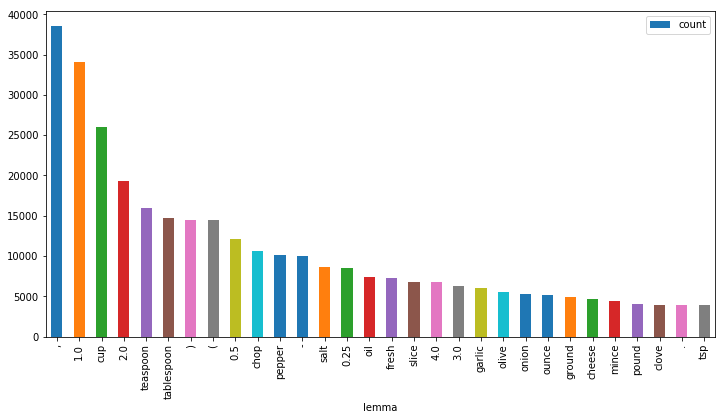

In [7]:
# Top 30 words by Count
# all_words.head(30)
df_bar_chart(all_words.iloc[:30,:], 'lemma')

Looks good with decent variety. I'm worried about the numbers - we may be overfitting to a specific number instead of `is_number`. But for now it will suffice.

### Part of Speech

In [8]:
pos_counts = get_col_by_count(sents, 'pos')

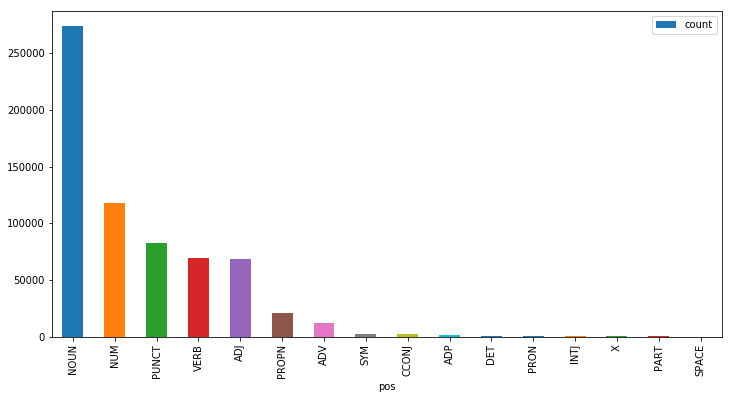

In [9]:
df_bar_chart(pos_counts, 'pos')

Seeing a majority of the POS tags be nouns, numbers, verbs, and adjectives makes a lot of sense. We are dealing with a specific kind of sentence with a very predictable structure.

### Tag

In [10]:
tag_counts = get_col_by_count(sents, 'tag')

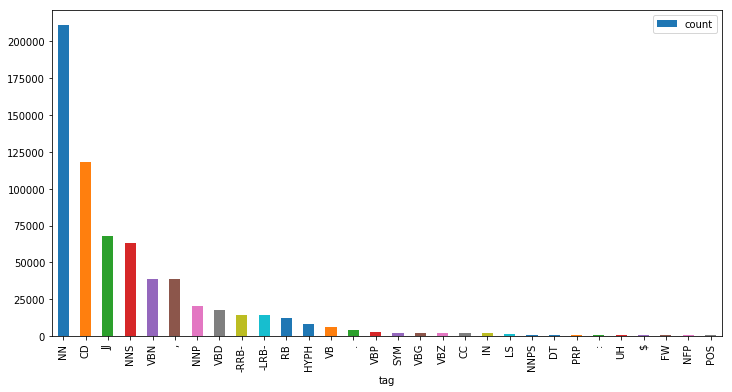

In [11]:
df_bar_chart(tag_counts.iloc[:30,:], 'tag')

This is related to the Part of Speech. 

### is Alphabetical

In [12]:
is_alpha = get_col_by_count(sents, 'is_alpha')
is_alpha

,is_alpha,count
0,True,443754
1,False,211034


### is Numeric

In [13]:
is_num = get_col_by_count(sents, 'is_num')
is_num

,is_num,count
0,False,541089
1,True,113699


### Label

In [14]:
labels = get_col_by_count(sents, 'label')

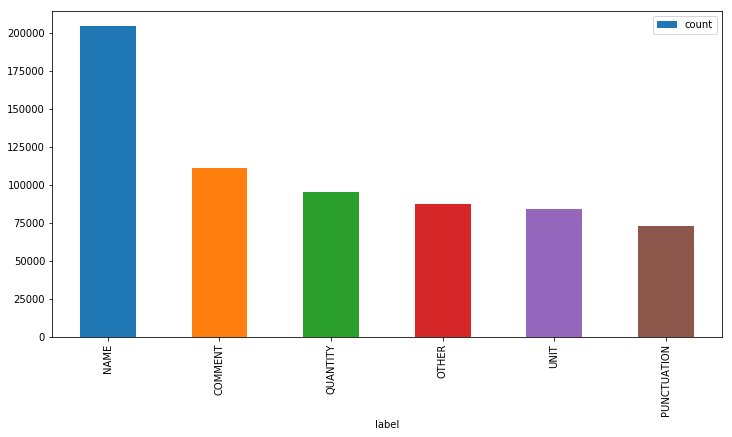

In [15]:
df_bar_chart(labels, 'label')

# Summary
- Vast majority of words are nouns. This makes sense because a `name` was required for all rows, and `name`'s are typically nouns!
- 2:1 alphabetical to not, which seems a bit low. I would expect there to be many more alphabetical words than not
- Not many numeric chars overall which makes sense
- About half of the recipes have a quantity, and a little less have a unit. The difference between quantity and unit seems about right.

Eye-balling the results we can see we have fairly skewed data. There are many things we can do w.r.t. the data but we will leave those for the future. 